## Convolutional Neural Network on MNIST Dataset

In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # suppress info and warning messages
import tensorflow.keras as keras
import math
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# The mnist data set comes preloaded 
mnist = keras.datasets.mnist

# Create training and test sets
(X_train, y_train),(X_test, y_test) = mnist.load_data()


In [3]:
# Inspect data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

The first example in the training data is a 28 x 28 array.  This array encodes the grayscale value of the  hand-written image, i.e., each entry in the 28 x 28 array encodes the intensity (darkness) of the corresponding pixel. 

<Axes: >

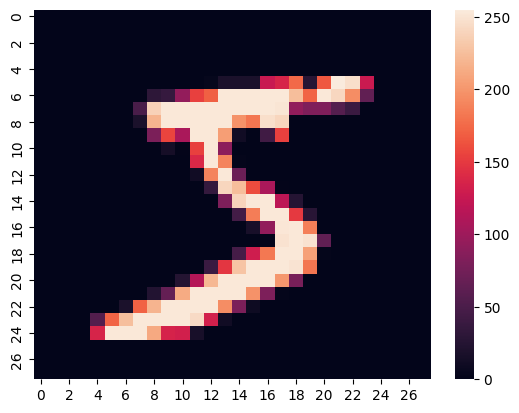

In [6]:
# Visualize data
sns.heatmap(X_train[0])

In [7]:
# Inspect corresponding label
y_train[0]

5

In [8]:
# Function to visualize the data
def plot_imgs(images, labels=None):
    subplots_x = int(math.ceil(len(images) / 5))
    plt.figure(figsize=(10,2*subplots_x))
    for i in range(min(len(images), subplots_x*5)):
        plt.subplot(subplots_x,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        if labels is not None:
            plt.xlabel(labels[i])
    plt.show()
    

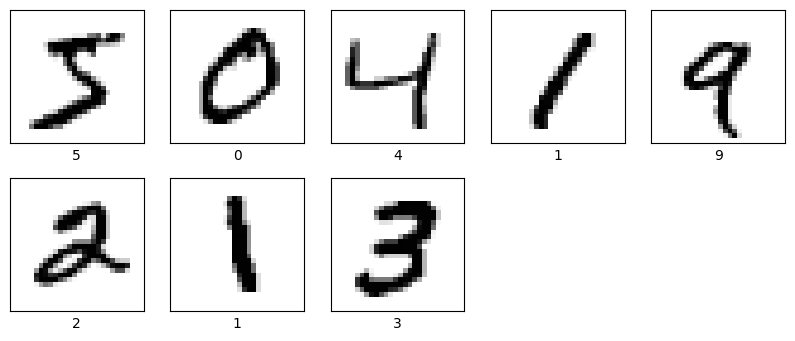

In [9]:
# Visualize some training examples
plot_imgs(X_train[:8], y_train[:8])

In [10]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
# Reshape the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#### Construct the Convolutional Neural Network

In [12]:
# reate CNN model object
cnn_model = keras.Sequential()

# Create the input layer
input_layer = keras.layers.InputLayer(input_shape = X_train.shape[1:])
cnn_model.add(input_layer)

# Create the first convolutional layer
conv1 = keras.layers.Conv2D(filters=16, kernel_size=3)
batchNorm_1 = keras.layers.BatchNormalization()
reLU_1 = keras.layers.ReLU()
cnn_model.add(conv1)
cnn_model.add(batchNorm_1)
cnn_model.add(reLU_1)

# Create the second convolutional layer 
conv2 = keras.layers.Conv2D(filters=32, kernel_size=3)
batchNorm_2 = keras.layers.BatchNormalization()
reLU_2 = keras.layers.ReLU()
cnn_model.add(conv2)
cnn_model.add(batchNorm_2)
cnn_model.add(reLU_2)

# Create the third convolutional layer
conv3 = keras.layers.Conv2D(filters=64, kernel_size=3)
batchNorm_3 = keras.layers.BatchNormalization()
reLU_3 = keras.layers.ReLU()
cnn_model.add(conv3)
cnn_model.add(batchNorm_3)
cnn_model.add(reLU_3)

# Create the fourth convolutional layer
conv4 = keras.layers.Conv2D(filters=128, kernel_size=3)
batchNorm_4 = keras.layers.BatchNormalization()
reLU_4 = keras.layers.ReLU()
cnn_model.add(conv4)
cnn_model.add(batchNorm_4)
cnn_model.add(reLU_4)

# Create the pooling layer
pooling_layer = keras.layers.GlobalAveragePooling2D()
cnn_model.add(pooling_layer)

# Create the output layer 
output_layer = keras.layers.Dense(units=10)
cnn_model.add(output_layer)

cnn_model.summary()

C:\Users\sophi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 22, 22, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,402 (388.29 KB)

 Trainable params: 98,922 (386.41 KB)

 Non-trainable params: 480 (1.88 KB)

In [13]:
# Optimization function
sgd_optimizer = keras.optimizers.SGD(learning_rate = 0.1)

In [14]:
# Loss function
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [15]:
# Compile the Model
cnn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

In [18]:
num_epochs = 1 # Number of epochs

t0 = time.time() # start time

history = cnn_model.fit(X_train, y_train, epochs=num_epochs)

t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9713 - loss: 0.1053
Elapsed time: 55.35s


In [19]:
# Evaluate performance
loss, accuracy = cnn_model.evaluate(X_test, y_test)

print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9525 - loss: 0.1488
Loss:  0.12685075402259827 Accuracy:  0.9595999717712402


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


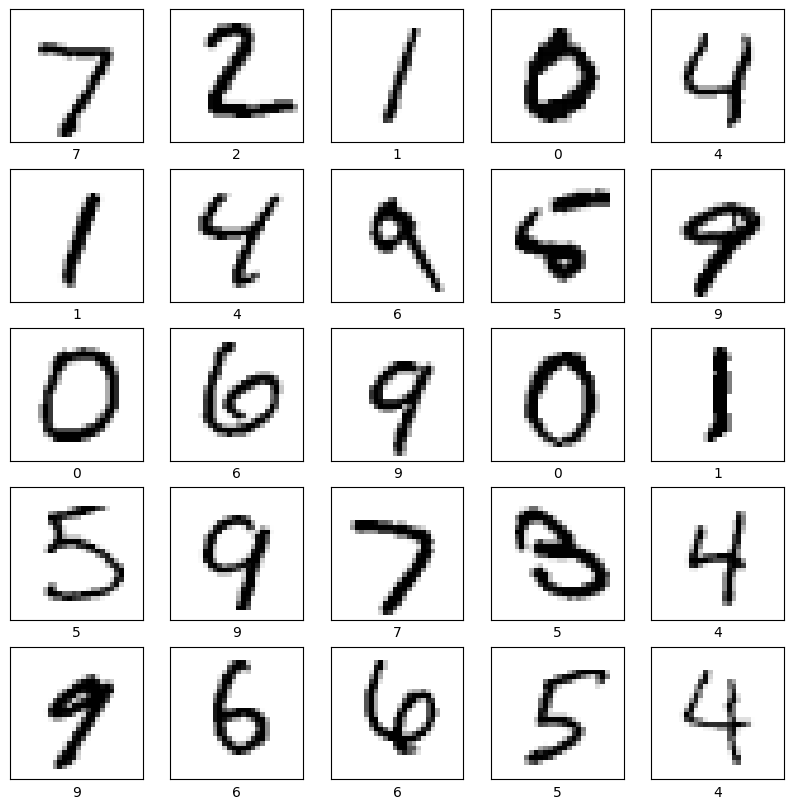

In [20]:
# Make predictions on the test set
logits = cnn_model.predict(X_test)
predictions = logits.argmax(axis = 1)


## Plot individual predictions
plot_imgs(X_test[:25], predictions[:25])